![link text](https://www.medicasur.com.mx/work/models/ms/Resource/9676/200421-portada-COVID.jpg)

<div style="Text-align: center">
    <h1> Coronavirus en México </h1><br>
        <h2> Análisis inteligente de datos</h2>
       <p><strong> Nombre docente </strong></p>
            <p> Jose Gabriel Rodriguez Rivas <p>
            <p><strong> Nombre Alumno </strong></p>
</div>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
covidmx = pd.read_csv('./covid19mexico.csv', encoding='latin1')
covidmx.shape[0]

1091695

In [4]:
covidmx.drop(['FECHA_ACTUALIZACION','ID_REGISTRO','ORIGEN','ENTIDAD_NAC'], inplace=True, axis=1)

covidmx.head()

,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,3,2,1,2,2,1,2020-05-18,2020-05-15,9999-99-99,97,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,3,2,2,2,2,1,2020-05-26,2020-05-22,9999-99-99,97,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,4,9,1,9,15,2,2020-04-09,2020-04-09,9999-99-99,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
3,4,26,1,26,55,1,2020-03-23,2020-03-12,9999-99-99,97,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,3,15,2,15,33,2,2020-05-24,2020-05-20,2020-06-12,1,...,2,1,2,2,1,1,99,MÃ©xico,99,2


# Contagios México

In [5]:
resultados = covidmx['RESULTADO'].value_counts(sort=False)
resultados.rename({1: 'Positivos', 2: 'Negativos', 3: 'Pendientes'}, inplace=True)
resultados

Positivos     480278
Negativos     526911
Pendientes     84506
Name: RESULTADO, dtype: int64

#### Casos positivos acumulados
480,278
#### Casos negativos acumulados
526,911
#### Casos sospechosos acumulados
84,506

In [6]:
pct = [100/1091695*n for n in resultados]
pct

[43.99378947416632, 48.26540379868003, 7.740806727153646]

([<matplotlib.patches.Wedge at 0x7f3f7646bcd0>,
 [Text(0.20633027850320731, 1.0804757360407446, 'Positivos'),
  Text(-0.46043214270919997, -0.9990006216015159, 'Negativos'),
  Text(1.0676336521338765, -0.2648742811812441, 'Pendientes')],
 [Text(0.1125437882744767, 0.5893504014767698, '43.99%'),
  Text(-0.251144805114109, -0.5449094299644631, '48.27%'),
  Text(0.5823456284366598, -0.14447688064431496, '7.74%')])

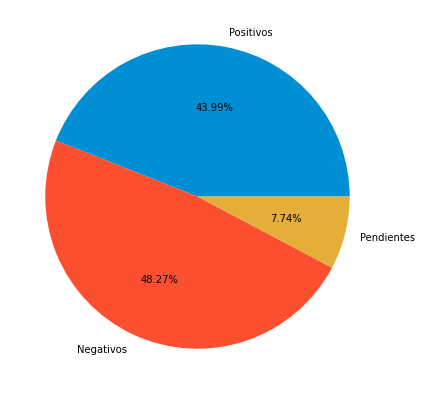

In [7]:
fig, ax = plt.subplots(figsize=(20, 7))

labels = 'Positivos', 'Negativos', 'Pendientes'

ax.pie(pct, labels=labels, autopct='%1.2f%%')

## Defunciones

In [8]:
defuncionest = covidmx[covidmx['FECHA_DEF'] != '9999-99-99']
defuncionest.shape[0]

67165

#### Total de defunciones
67,165

In [9]:
defunciones = defuncionest['RESULTADO'].value_counts()
defunciones.rename({1: 'con COVID-19', 2: 'sin COVID-19', 3: 'Pendientes'}, inplace=True)
defunciones

con COVID-19    52298
sin COVID-19    12437
Pendientes       2430
Name: RESULTADO, dtype: int64

#### Defunciones con COVID-19
52,298
#### Defunciones sin COVID-19
12,437
#### Defunciones con resultado pendiente
2,430

In [10]:
pctd = [100/defuncionest.shape[0]*n for n in defunciones]
pctd

[77.86495942827365, 18.517084791185884, 3.6179557805404596]

([<matplotlib.patches.Wedge at 0x7f3f75cfc100>,
 [Text(-0.8445822461340543, 0.7047558651867722, 'con COVID-19'),
  Text(0.7592012998249641, -0.7959983582546418, 'sin COVID-19'),
  Text(1.092902216258395, -0.124758749983673, 'Pendientes')],
 [Text(-0.46068122516402954, 0.3844122901018758, '77.86%'),
  Text(0.41410979990452584, -0.43418092268435005, '18.52%'),
  Text(0.596128481595488, -0.06805022726382164, '3.62%')])

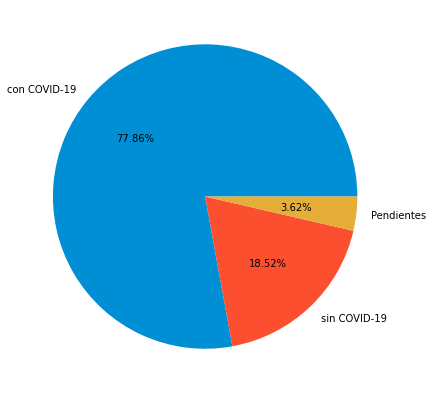

In [11]:
fig, ax = plt.subplots(figsize=(20, 7))

ax.pie(pctd, labels=defunciones.index, autopct='%1.2f%%')

# Casos positivos

In [12]:
positivos = covidmx[covidmx.RESULTADO == 1]
positivos.shape

(480278, 31)

### Genero y Tipo paciente

In [13]:
genero = positivos['SEXO'].value_counts()
genero

2    254349
1    225929
Name: SEXO, dtype: int64

#### Hombres 254,349
#### Mujeres 225,929

In [14]:
tipop = positivos['TIPO_PACIENTE'].value_counts()
tipop

1    352466
2    127812
Name: TIPO_PACIENTE, dtype: int64

#### Ambulatorios 352,466
#### Hospitalizados 127,812

In [15]:
pctg = [100/480278*n for n in genero]

pctt= [100/480278*n for n in tipop]

print(pctg, pctt)

[52.95870308446358, 47.04129691553642] [73.38791283381708, 26.61208716618292]


([<matplotlib.patches.Wedge at 0x7f3f7698e6d0>,
 [Text(-0.7374443065096563, 0.8161959904315215, 'Ambulatorios'),
  Text(0.7374443829274366, -0.816195921386999, 'Hospitalizados')],
 [Text(-0.402242349005267, 0.44519781296264804, '73.39%'),
  Text(0.4022423906876927, -0.44519777530199944, '26.61%')])

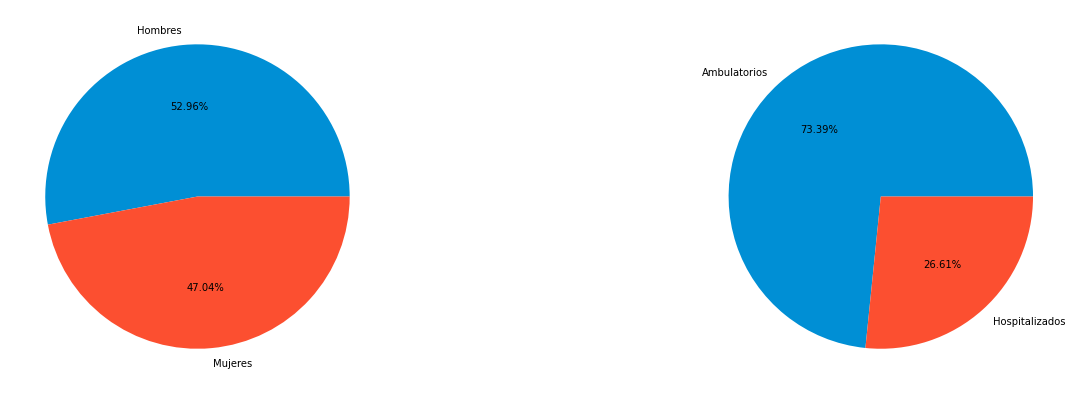

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

labelsg = 'Hombres', 'Mujeres'
labelst = 'Ambulatorios', 'Hospitalizados'

ax[0].pie(pctg, labels=labelsg, autopct='%1.2f%%')
ax[1].pie(pctt, labels=labelst, autopct='%1.2f%%')

### Embarazo e Intubados

In [17]:
embarazo = positivos['EMBARAZO'].value_counts()
embarazo.drop(97, inplace=True)
embarazo

2     220890
1       3480
98      1559
Name: EMBARAZO, dtype: int64

#### Embarazos
3480

In [18]:
intubado = positivos['INTUBADO'].value_counts()
intubado.drop(97, inplace=True)
intubado

2     115408
1      12288
99       116
Name: INTUBADO, dtype: int64

#### Intubados
12288

In [19]:
pcte = [100/225929*n for n in embarazo]

pcti= [100/127812*n for n in intubado]

print(pcte, pcti)

[97.76965329816004, 1.540306910578102, 0.6900397912618565] [90.29512095890838, 9.614120739836634, 0.09075830125496823]


([<matplotlib.patches.Wedge at 0x7f3f755c0dc0>,
 [Text(-1.0492686845773522, 0.3302048266838528, 'Negativo'),
  Text(1.0483228889194278, -0.333195318946148, 'Positivo'),
  Text(1.0999955280619895, -0.0031365974598247053, 'No especificado')],
 [Text(-0.5723283734058284, 0.18011172364573788, '90.30%'),
  Text(0.5718124848651424, -0.18174290124335346, '9.61%'),
  Text(0.5999975607610851, -0.0017108713417225664, '0.09%')])

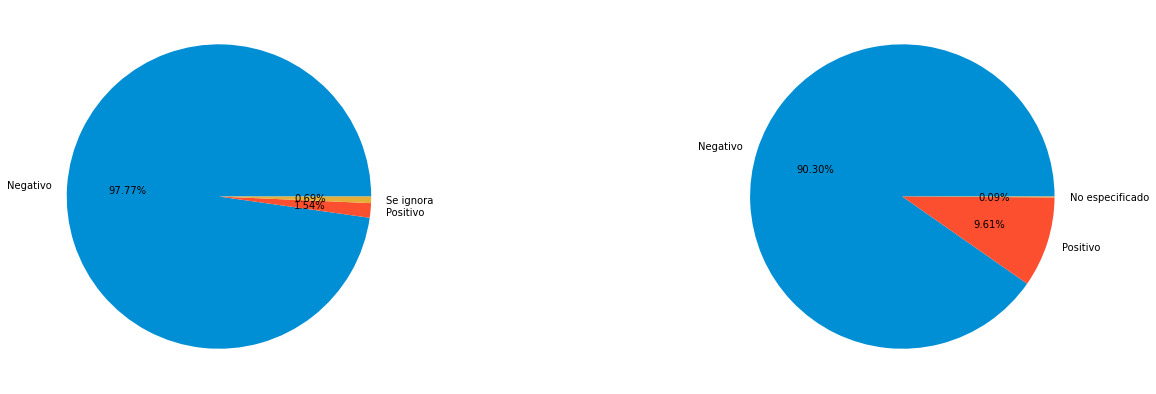

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

labelse = 'Negativo', 'Positivo', 'Se ignora'
labelsi = 'Negativo', 'Positivo', 'No especificado'

ax[0].pie(pcte, labels=labelse, autopct='%1.2f%%')
ax[1].pie(pcti, labels=labelsi, autopct='%1.2f%%')

## Edades

In [21]:
edad = positivos['EDAD'].value_counts(sort=False)
edad

0      973
1      677
2      426
3      377
4      379
      ... 
108      1
112      1
114      1
116      1
118      1
Name: EDAD, Length: 113, dtype: int64

#### Recien nacidos con COVID-19
973

#### Persona de mayor edad con COVID-19 
118

Text(0.5, 1.0, 'Positivos por edad')

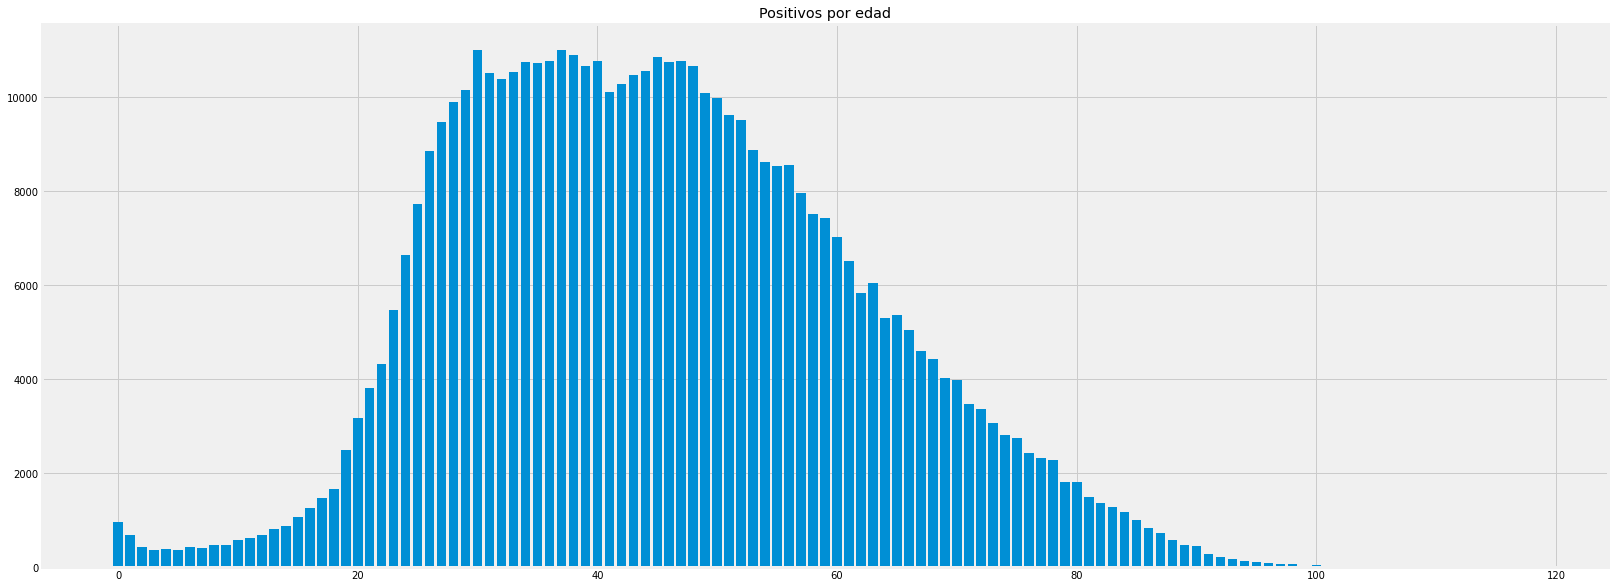

In [22]:
fig, axs = plt.subplots(figsize=(25,10))

axs.bar(edad.index, edad)

axs.set_title('Positivos por edad')

## Defunciones por edades

In [23]:
edadefuncion = positivos[(positivos.FECHA_DEF != '9999-99-99')]['EDAD'].value_counts(sort=False)

edadefuncion

0       47
32     180
64    1414
96      30
1       34
      ... 
62    1387
94      53
31     169
63    1458
95      42
Name: EDAD, Length: 103, dtype: int64

Text(0.5, 1.0, 'Defunciones por edad')

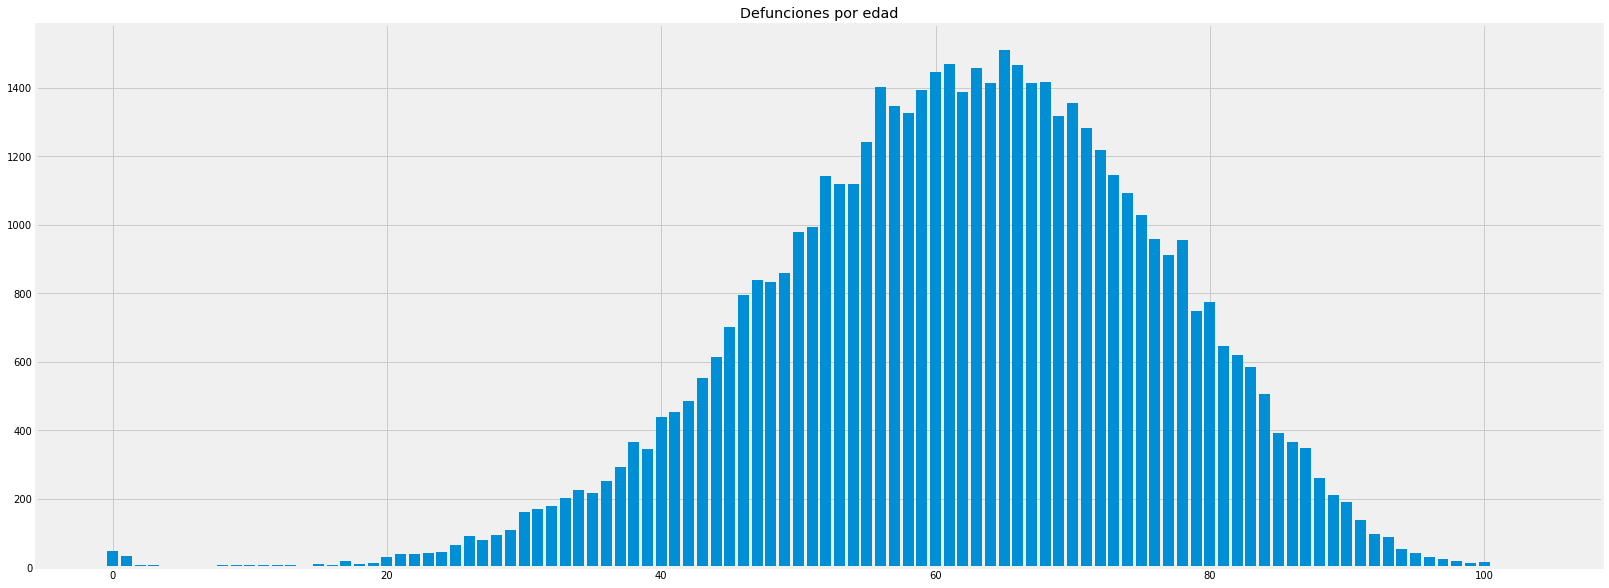

In [24]:
fig, axs = plt.subplots(figsize=(25,10))

axs.bar(edadefuncion.index, edadefuncion)

axs.set_title('Defunciones por edad')

## Defunciones por enfermedades

In [25]:
defuncionesp = positivos[positivos.FECHA_DEF != '9999-99-99']

columns = ['SI', 'NO', 'NO APLICA', 'SE IGNORA', 'NO ESPECIFICADO']

index = ['NEUMONIA', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO']

bins = [0,1,96,97.5,98.5,99.5]

values = [np.array(defuncionesp['NEUMONIA'].value_counts(sort=False, bins=bins)),
         np.array(defuncionesp['DIABETES'].value_counts(sort=False, bins=bins)),
         np.array(defuncionesp['EPOC'].value_counts(sort=False, bins=bins)),
         np.array(defuncionesp['ASMA'].value_counts(sort=False, bins=bins)),
         np.array(defuncionesp['INMUSUPR'].value_counts(sort=False, bins=bins)),
         np.array(defuncionesp['HIPERTENSION'].value_counts(sort=False, bins=bins)),
         np.array(defuncionesp['OTRA_COM'].value_counts(sort=False, bins=bins)),
         np.array(defuncionesp['CARDIOVASCULAR'].value_counts(sort=False, bins=bins)),
         np.array(defuncionesp['OBESIDAD'].value_counts(sort=False, bins=bins)),
         np.array(defuncionesp['RENAL_CRONICA'].value_counts(sort=False, bins=bins)),
         np.array(defuncionesp['TABAQUISMO'].value_counts(sort=False, bins=bins)),
         np.array(defuncionesp['OTRO_CASO'].value_counts(sort=False, bins=bins))]

enfermedades = pd.DataFrame(values, index=index, columns=columns)

enfermedades


,SI,NO,NO APLICA,SE IGNORA,NO ESPECIFICADO
NEUMONIA,38854,13444,0,0,0
DIABETES,19847,32146,0,305,0
EPOC,2529,49477,0,292,0
ASMA,1071,50942,0,285,0
INMUSUPR,1369,50619,0,310,0
HIPERTENSION,22929,29086,0,283,0
OTRA_COM,2699,49113,0,486,0
CARDIOVASCULAR,2774,49208,0,316,0
OBESIDAD,12862,39128,0,308,0
RENAL_CRONICA,3540,48461,0,297,0


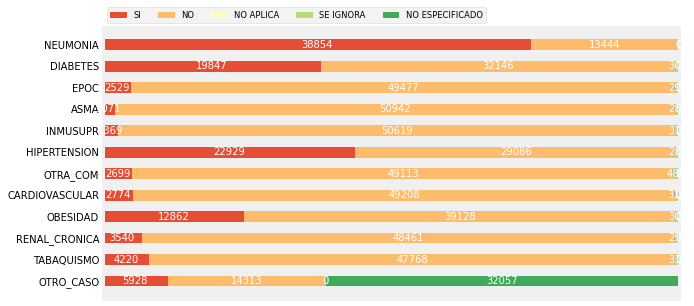

In [26]:
labels = index
data = np.array(values)
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(
np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))

ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(columns, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
        ax.legend(ncol=len(columns), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

### Comparación de los fallecimientos de enfermos y no enfermos en porcentajes

In [27]:
pcted = [100/defuncionesp.shape[0]*n for n in enfermedades['SI']]
pcted

valuesc = np.array([np.array([100/defuncionesp.shape[0]*n for n in enfermedades['SI']]),
          np.array([100/defuncionesp.shape[0]*n for n in enfermedades['NO']])])

comparacion = pd.DataFrame(valuesc, index=['SI', 'NO'], columns=index)

comparacion = comparacion.transpose()

comparacion

,SI,NO
NEUMONIA,74.293472,25.706528
DIABETES,37.949826,61.466978
EPOC,4.835749,94.605912
ASMA,2.047879,97.407167
INMUSUPR,2.617691,96.789552
HIPERTENSION,43.842977,55.615894
OTRA_COM,5.160809,93.909901
CARDIOVASCULAR,5.304218,94.091552
OBESIDAD,24.593675,74.817393
RENAL_CRONICA,6.768901,92.663199


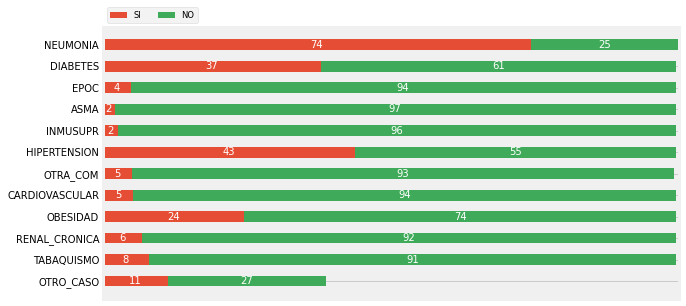

In [28]:
labels = index
data = valuesc.T
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(
np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))

ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(['SI', 'NO'], category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
        ax.legend(ncol=len(['SI', 'NO']), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


#### Las principales enfermedades en los fallecimientos son:
##### Diabetes
37% de los fallecidos
##### Hipertensión
43% de los fallecidos
##### Obesidad
24% de los fallecidos

### Conjuntos de las 3 principales enfermedades en los falleciminetos

In [29]:
obesidadiabeteshipertension = [defuncionesp[(defuncionesp.OBESIDAD != 1) & (defuncionesp.DIABETES == 1) & (defuncionesp.HIPERTENSION != 1)].shape[0]]
obesidadiabeteshipertension.append(defuncionesp[(defuncionesp.OBESIDAD != 1) & (defuncionesp.DIABETES != 1) & (defuncionesp.HIPERTENSION == 1)].shape[0])
obesidadiabeteshipertension.append(defuncionesp[(defuncionesp.OBESIDAD != 1) & (defuncionesp.DIABETES == 1) & (defuncionesp.HIPERTENSION == 1)].shape[0])
obesidadiabeteshipertension.append(defuncionesp[(defuncionesp.OBESIDAD == 1) & (defuncionesp.DIABETES != 1) & (defuncionesp.HIPERTENSION != 1)].shape[0])
obesidadiabeteshipertension.append(defuncionesp[(defuncionesp.OBESIDAD == 1) & (defuncionesp.DIABETES == 1) & (defuncionesp.HIPERTENSION != 1)].shape[0])
obesidadiabeteshipertension.append(defuncionesp[(defuncionesp.OBESIDAD == 1) & (defuncionesp.DIABETES != 1) & (defuncionesp.HIPERTENSION == 1)].shape[0])
obesidadiabeteshipertension.append(defuncionesp[(defuncionesp.OBESIDAD == 1) & (defuncionesp.DIABETES == 1) & (defuncionesp.HIPERTENSION == 1)].shape[0])

sumodh = sum(obesidadiabeteshipertension)
pctodh = 100/defuncionesp.shape[0]*sumodh

print(sumodh, pctodh)

34747 66.44039925044935


#### Personas con alguna de las tres principales enfermedades
34,747 

66.44% del total de defunciones por COVID-19

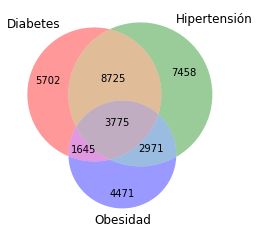

In [30]:
from matplotlib_venn import venn3

venn3(obesidadiabeteshipertension, set_labels = ('Diabetes', 'Hipertensión', 'Obesidad'))

## Estados

In [31]:
positivos = covidmx[covidmx.RESULTADO == 1]
negativos = covidmx[covidmx.RESULTADO == 2]
pendientes = covidmx[covidmx.RESULTADO == 3]

name = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila',
        'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato', 'Guerrero',
        'Hidalgo', 'Jalisco', 'México', 'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León',
        'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora',
        'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']

index = ['Estado' ,'Positivo', 'No positivo', 'Pendiente']

values = [np.array(name), np.array(positivos['ENTIDAD_RES'].value_counts(sort=False)),
         np.array(negativos['ENTIDAD_RES'].value_counts(sort=False)),
         np.array(pendientes['ENTIDAD_RES'].value_counts(sort=False))]

estados = pd.DataFrame(values, index=index)

estados = estados.transpose()

estados

,Estado,Positivo,No positivo,Pendiente
0,Aguascalientes,4506,8939,309
1,Baja California,14502,8266,1135
2,Baja California Sur,5465,7087,476
3,Campeche,4986,3939,114
4,Coahuila,15494,21796,3269
5,Colima,2275,1842,299
6,Chiapas,5964,3205,208
7,Chihuahua,6006,5981,2279
8,Ciudad de México,80383,117190,14974
9,Durango,4818,9445,903


### Positivos

Text(0.5, 1.0, 'Positivos por estado')

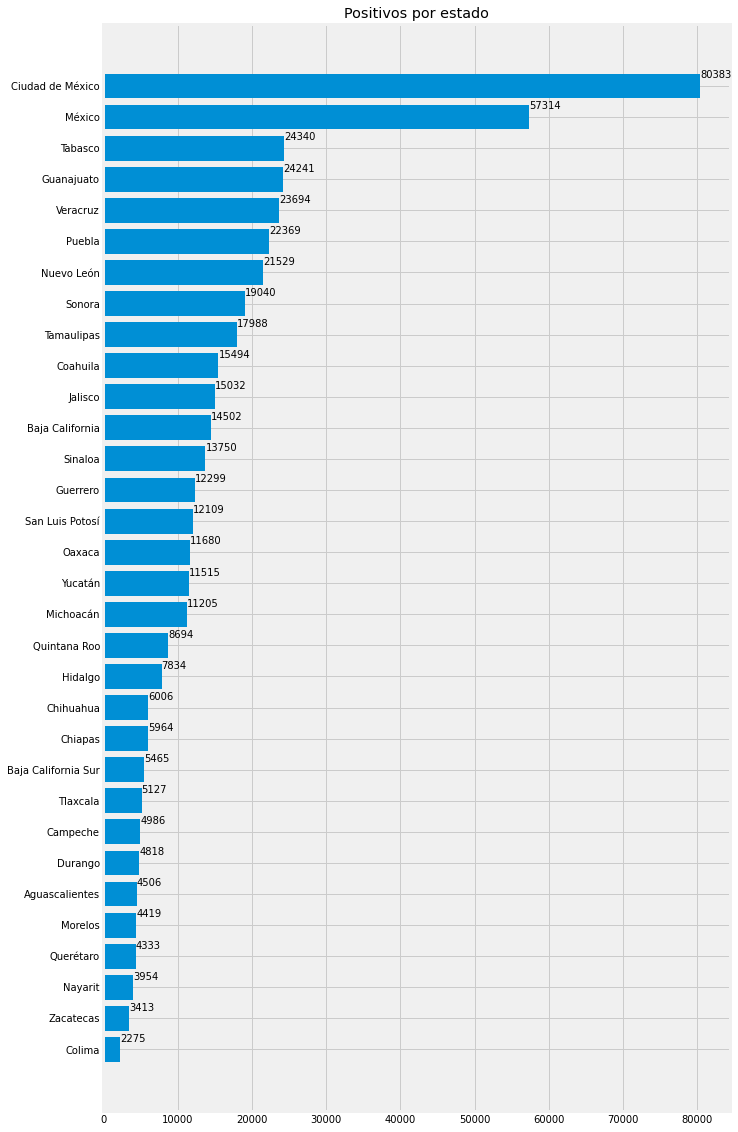

In [32]:
estados = estados.sort_values('Positivo')

fig, axs = plt.subplots(figsize=(10,20))

axs.barh(estados['Estado'], estados['Positivo'])

for i, v in enumerate(estados['Positivo']):
    axs.text(v + 3, i + .25, str(v), color='black')

axs.set_title('Positivos por estado')

In [33]:
with open('mapbox_key.txt', 'r') as f:
    mapbox =  f.readlines()

In [44]:
bins = list(estados['Positivo'].quantile([0,0.25,0.5,0.75,0.95,1]))
bins

[2275.0, 5091.75, 11597.5, 18251.0, 39178.299999999974, 80383.0]

In [34]:
m = folium.Map(
    location=[24, -103],
    zoom_start=5.3,
    tiles=mapbox[0],
    attr='Misael Vargas'
    )

bins = list(estados['Positivo'].quantile([0,0.25,0.5,0.75,0.95,1]))

folium.Choropleth(
    geo_data='mexico_estados.json',
    name='Estados',
    data=estados,
    columns=['Estado', 'Positivo'],
    key_on='feature.properties.name',
    bins=bins,
    fill_color='YlOrRd',
    fill_opacity=.9,
    line_opacity=0.2
).add_to(m)

folium.features.GeoJson(
    'mexico_estados.json',
    lambda x:{'opacity': 0, 'fillOpacity': 0},
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name','contagios'],
        aliases=['Estado:','N° de contagios:']
        )
    ).add_to(m)

m

In [35]:
import json 

with open('mexico_municipios.json') as json_file:
    data = json.load(json_file)

In [36]:
data.keys()

dict_keys(['type', 'features'])

In [37]:
municipios = [[],[],[],[]]

for m in data['features']:
    municipios[0].append(m['properties']['estado'])
    municipios[1].append(m['properties']['NOMGEO'])
    municipios[2].append(m['properties']['acumlds'])
    municipios[3].append(m['properties']['muertes'])

index = ['Estado','NOMGEO', 'Positivos', 'Defunciones']

df_municipios = pd.DataFrame(municipios, index=index)

df_municipios = df_municipios.transpose()

df_municipios

,Estado,NOMGEO,Positivos,Defunciones
0,Aguascalientes,Aguascalientes,3457,263
1,Aguascalientes,Asientos,78,6
2,Aguascalientes,Calvillo,133,2
3,Aguascalientes,Cosío,72,0
4,Aguascalientes,Jesús María,155,7
...,...,...,...,...
2460,Zacatecas,Villa Hidalgo,7,2
2461,Zacatecas,Villanueva,27,3
2462,Zacatecas,Zacatecas,718,56
2463,Zacatecas,Trancoso,21,3


In [38]:
df_municipios = df_municipios.sort_values('Positivos', ascending=False)

df_municipios['Positivos'].quantile([0,0.20,0.4,0.6,0.8,1])

0.0        0
0.2        1
0.4        7
0.6       23
0.8       88
1.0    14840
Name: Positivos, dtype: object

In [50]:
m = folium.Map(
    location=[24, -103],
    #min_zoom=8,
    zoom_start=8,
    tiles=mapbox[1],
    attr='Misael Vargas'
    )

#bins = list(estados['Positivo'].quantile([0,0.25,0.5,0.75,0.95,1]))

#folium.Choropleth(
#    geo_data='mexico_municipios.json',
#    name='Municipios',
#    data=df_municipios,
#    columns=['NOMGEO', 'Positivos'],
#    key_on='feature.properties.NOMGEO',
#    bins=9,
#    fill_color='YlOrRd',
#    fill_opacity=.9,
#    line_opacity=0.2
#).add_to(m)

# folium.features.GeoJson(
#     'mexico_municipios.json',
#     lambda x:{'opacity': 0, 'fillOpacity': 0},
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['NOMGEO','acumlds'],
#         aliases=['Municipio:','N° de contagios:']
#         )
#     ).add_to(m)

m#.save(outfile="map.html")